**training with simple convolution neural networks**

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]
[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


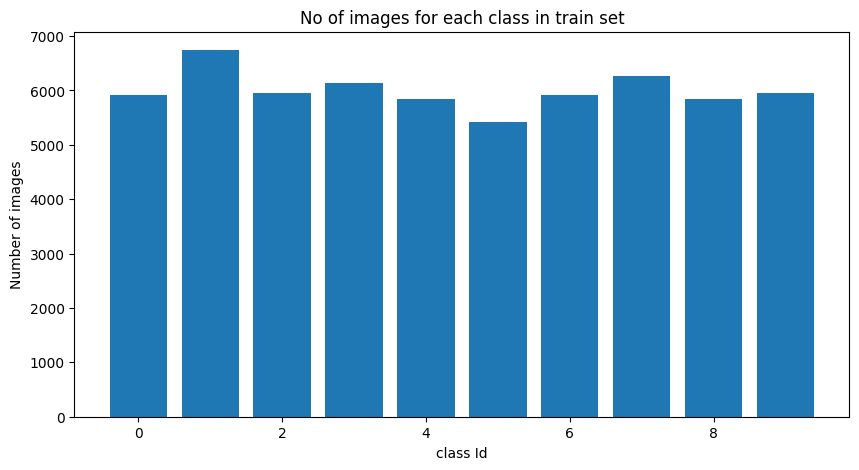

Epoch 1/10
300/300 - 3s - loss: 0.2363 - accuracy: 0.9319 - val_loss: 0.0551 - val_accuracy: 0.9842 - 3s/epoch - 10ms/step
Epoch 2/10
300/300 - 2s - loss: 0.0552 - accuracy: 0.9826 - val_loss: 0.0385 - val_accuracy: 0.9880 - 2s/epoch - 5ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0284 - val_accuracy: 0.9905 - 2s/epoch - 6ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0326 - val_accuracy: 0.9903 - 1s/epoch - 4ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0226 - accuracy: 0.9930 - val_loss: 0.0267 - val_accuracy: 0.9921 - 1s/epoch - 5ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.0269 - val_accuracy: 0.9910 - 1s/epoch - 5ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0155 - accuracy: 0.9952 - val_loss: 0.0293 - val_accuracy: 0.9908 - 1s/epoch - 4ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.0266 - val_accuracy: 0.9915 - 1s/epoch - 4ms/step
Epoch 9/10
300/300 - 1s

In [8]:
# Importing necessary libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Calculate the distribution of classes in the training and test set
classNo = [0 for x in range(0,10)]
for i in (y_train):
    classNo[int(i)] += 1
print(classNo)

classNo = [0 for x in range(0,10)]
for i in (y_test):
    classNo[i] += 1
print(classNo)

# Count samples for each class
numOfSamples = []
for x in range(0,10):
    numOfSamples.append(len(np.where(y_train==x)[0]))
print(numOfSamples)

# Plotting the distribution
plt.figure(figsize=(10,5))
plt.bar(range(0,10), numOfSamples)
plt.title("No of images for each class in train set")
plt.xlabel("class Id")
plt.ylabel("Number of images")
plt.show()

# Normalize the images to values between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape images to include the depth dimension (for CNN compatibility)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encoding the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Building the CNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu')) # First convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2))) # First pooling layer
model.add(Conv2D(64, (5, 5), activation='relu')) # Second convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2))) # Second pooling layer
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu')) # Fully connected layer
model.add(Dense(10, activation='softmax')) # Output layer with softmax activation for multi-class classification

# Compile the model with optimizer, loss function and metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Save the trained model
model.save('mnist_digit_model.h5')


**training model with augmentation**

Epoch 1/10
1875/1875 - 29s - loss: 0.2194 - accuracy: 0.9319 - val_loss: 0.0522 - val_accuracy: 0.9824 - 29s/epoch - 15ms/step
Epoch 2/10
1875/1875 - 26s - loss: 0.0763 - accuracy: 0.9756 - val_loss: 0.0286 - val_accuracy: 0.9912 - 26s/epoch - 14ms/step
Epoch 3/10
1875/1875 - 25s - loss: 0.0570 - accuracy: 0.9819 - val_loss: 0.0240 - val_accuracy: 0.9920 - 25s/epoch - 13ms/step
Epoch 4/10
1875/1875 - 25s - loss: 0.0494 - accuracy: 0.9845 - val_loss: 0.0234 - val_accuracy: 0.9930 - 25s/epoch - 14ms/step
Epoch 5/10
1875/1875 - 25s - loss: 0.0428 - accuracy: 0.9867 - val_loss: 0.0213 - val_accuracy: 0.9937 - 25s/epoch - 13ms/step
Epoch 6/10
1875/1875 - 25s - loss: 0.0392 - accuracy: 0.9881 - val_loss: 0.0209 - val_accuracy: 0.9927 - 25s/epoch - 13ms/step
Epoch 7/10
1875/1875 - 26s - loss: 0.0367 - accuracy: 0.9890 - val_loss: 0.0196 - val_accuracy: 0.9946 - 26s/epoch - 14ms/step
Epoch 8/10
1875/1875 - 25s - loss: 0.0346 - accuracy: 0.9893 - val_loss: 0.0274 - val_accuracy: 0.9916 - 25s/ep

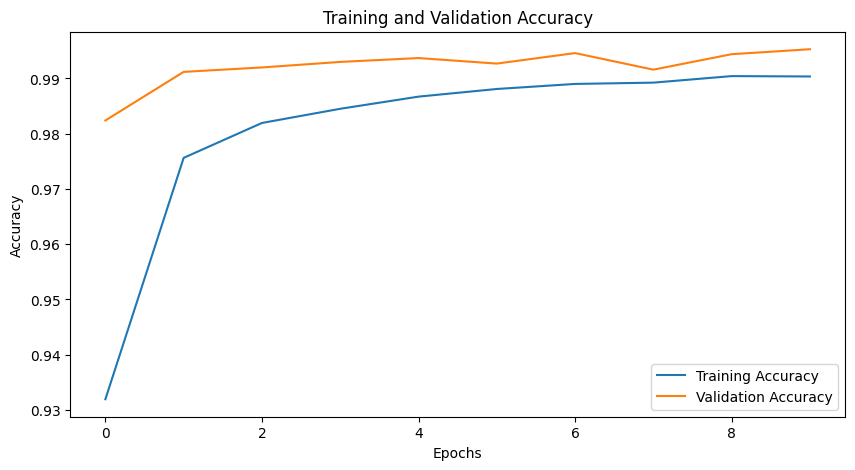

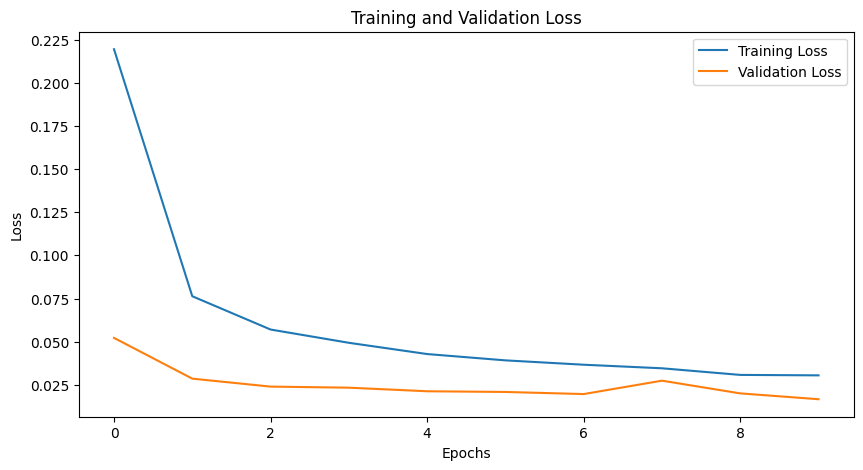

In [9]:
# Importing necessary libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images to values between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape images to include the depth dimension (for CNN compatibility)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encoding the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Building the CNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu')) # First convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2))) # First pooling layer
model.add(Conv2D(64, (5, 5), activation='relu')) # Second convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2))) # Second pooling layer
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu')) # Fully connected layer
model.add(Dense(10, activation='softmax')) # Output layer with softmax activation for multi-class classification

# Compile the model with optimizer, loss function, and metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Setting up Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,      # Randomly rotate images in the range (0 to 180 degrees)
    zoom_range = 0.1,       # Randomly zoom images
    width_shift_range=0.1,  # Randomly shift images horizontally
    height_shift_range=0.1, # Randomly shift images vertically
    horizontal_flip=False,  # Do not randomly flip images horizontally
    vertical_flip=False     # Do not randomly flip images vertically
)

# Fit the data augmentation to the training set
datagen.fit(X_train)

# Training the model with data augmentation
batch_size = 32
epochs = 10
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs, validation_data=(X_test, y_test),
                    verbose=2, steps_per_epoch=X_train.shape[0] // batch_size)

# Plotting training and validation accuracy over epochs
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss over epochs
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the trained model with data augmentation
model.save('with_aug_digit_model.h5')


**training model with inverted images and augmentation**

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]
[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


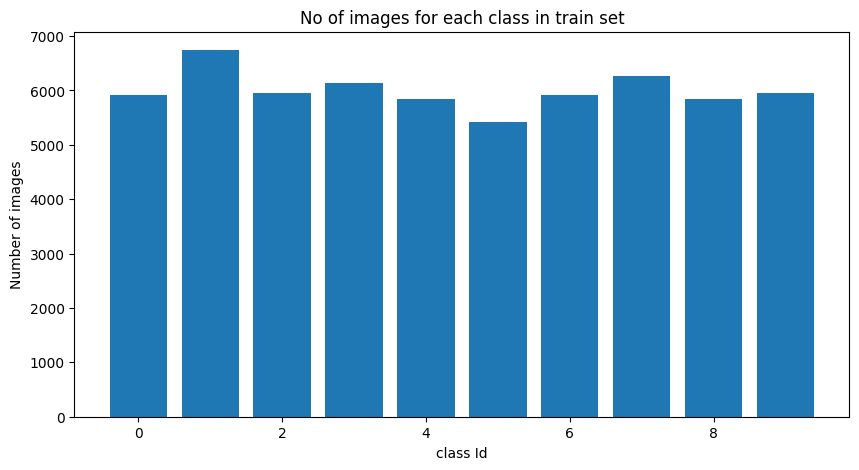

Epoch 1/10
3750/3750 - 54s - loss: 0.1912 - accuracy: 0.9389 - val_loss: 0.0350 - val_accuracy: 0.9867 - 54s/epoch - 14ms/step
Epoch 2/10
3750/3750 - 49s - loss: 0.0723 - accuracy: 0.9776 - val_loss: 0.0258 - val_accuracy: 0.9916 - 49s/epoch - 13ms/step
Epoch 3/10
3750/3750 - 49s - loss: 0.0557 - accuracy: 0.9829 - val_loss: 0.0271 - val_accuracy: 0.9913 - 49s/epoch - 13ms/step
Epoch 4/10
3750/3750 - 49s - loss: 0.0480 - accuracy: 0.9850 - val_loss: 0.0507 - val_accuracy: 0.9844 - 49s/epoch - 13ms/step
Epoch 5/10
3750/3750 - 49s - loss: 0.0425 - accuracy: 0.9867 - val_loss: 0.0193 - val_accuracy: 0.9939 - 49s/epoch - 13ms/step
Epoch 6/10
3750/3750 - 49s - loss: 0.0403 - accuracy: 0.9877 - val_loss: 0.0368 - val_accuracy: 0.9882 - 49s/epoch - 13ms/step
Epoch 7/10
3750/3750 - 49s - loss: 0.0366 - accuracy: 0.9886 - val_loss: 0.0254 - val_accuracy: 0.9930 - 49s/epoch - 13ms/step
Epoch 8/10
3750/3750 - 49s - loss: 0.0347 - accuracy: 0.9893 - val_loss: 0.0237 - val_accuracy: 0.9928 - 49s/ep

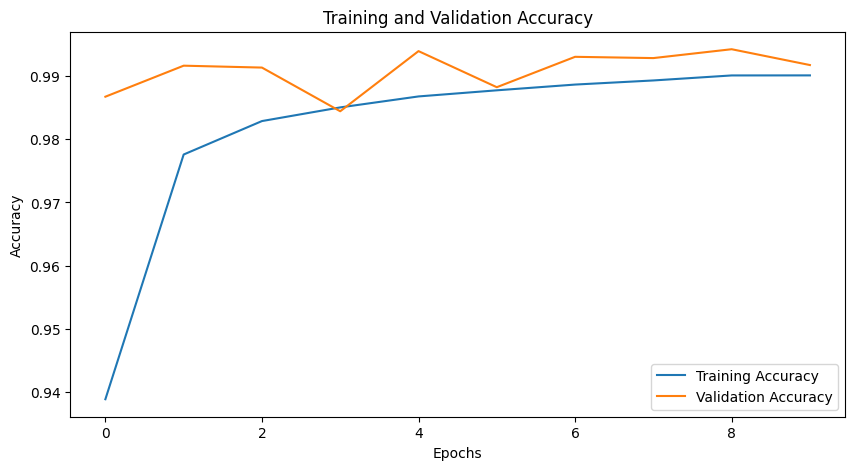

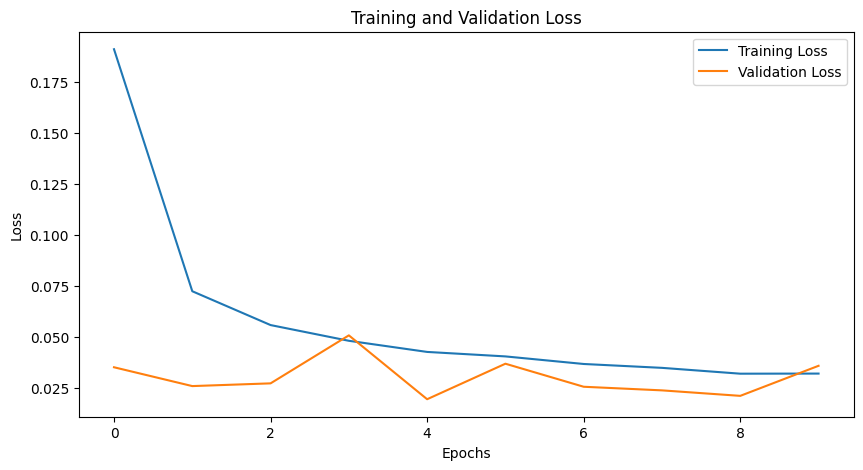

In [11]:
# Importing necessary libraries and modules
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Calculate and display the class distribution in training and test datasets
classNo = [0 for x in range(0,10)]
for i in (y_train):
    classNo[int(i)] += 1
print(classNo)

classNo = [0 for x in range(0,10)]
for i in (y_test):
    classNo[i] += 1
print(classNo)

# Count the samples for each class and display
numOfSamples = [len(np.where(y_train==x)[0]) for x in range(0,10)]
print(numOfSamples)

# Visualization of the dataset's distribution
plt.figure(figsize=(10,5))
plt.bar(range(0,10), numOfSamples)
plt.title("No of images for each class in train set")
plt.xlabel("class Id")
plt.ylabel("Number of images")
plt.show()

# Normalize the images to scale between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Inverting the images (white to black and vice versa)
X_train_inv = 1 - X_train
X_test_inv = 1 - X_test

# Concatenating original and inverted images for training set
X_train = np.concatenate([X_train, X_train_inv], axis=0)
y_train = np.concatenate([y_train, y_train], axis=0)

# Reshape images for CNN compatibility
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encoding of labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Building the CNN model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu')) # Convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer
model.add(Conv2D(64, (5, 5), activation='relu')) # Another convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2))) # Another pooling layer
model.add(Flatten()) # Flattening for dense layer
model.add(Dense(128, activation='relu')) # Dense layer
model.add(Dense(10, activation='softmax')) # Output layer

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Setting up data augmentation configurations
datagen = ImageDataGenerator(
    rotation_range=10,      # Random rotation in a range
    zoom_range = 0.1,       # Random zoom
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1, # Random vertical shift
    horizontal_flip=False,  # No horizontal flip
    vertical_flip=False     # No vertical flip
)
datagen.fit(X_train)

# Train model with data augmentation
batch_size = 32
epochs = 10
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs, validation_data=(X_test, y_test),
                    verbose=2, steps_per_epoch=X_train.shape[0] // batch_size)

# Plotting training and validation accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the trained model
model.save('with_inverted_digit_model.h5')
